<a href="https://colab.research.google.com/github/swapnamoy007/ML-ASSIGNMENT/blob/main/Module_7/Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 8 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

Please add your name and date

Swapnamoy dutta ; 11/12/2024

Answer 0:

In this homework, we will explore the use of ChatGPT as a code assistant to help understand and operationalize neural networks. As we discussed during the class, ChatGPT does an excellent work with simple code development - as long as the tasks are well formulated and we can check the code and results.

# Fashion MNIST classifier

Example prompt: "Write a Python code importing fashion MNIST data set and visualizing 10 random images along with the labels"

4422102/4422102 [==============================] - 1s 0us/step


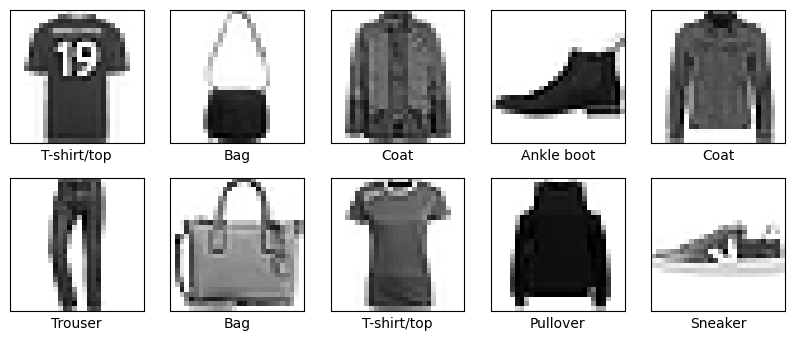

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the figure size
plt.figure(figsize=(10, 4))

# Select 10 random indices
random_indices = np.random.choice(len(train_images), 10)

# Plot images and labels
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[idx]])

plt.show()

1. Ask ChatGPT to write a DCNN classifier for Fashion-MNIST data. Specify that the network should use the dropout layers and normalization layers. Code should save the trained network weights, and also save history (loss and accuracy).

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7448 - loss: 0.7449 - val_accuracy: 0.8460 - val_loss: 0.4042
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.3774 - val_accuracy: 0.8839 - val_loss: 0.3105
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8787 - loss: 0.3344 - val_accuracy: 0.8812 - val_loss: 0.3101
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8892 - loss: 0.3073 - val_accuracy: 0.8864 - val_loss: 0.2997
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8967 - loss: 0.2887 - val_accuracy: 0.9078 - val_loss: 0.2514
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9043 - loss: 0.2682 - val_accuracy: 0.8809 - val_loss: 0.3226
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9087 - loss: 0.2499 - val_accuracy: 0.9080 - val_loss: 0.2499
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9085 - loss: 0.2494

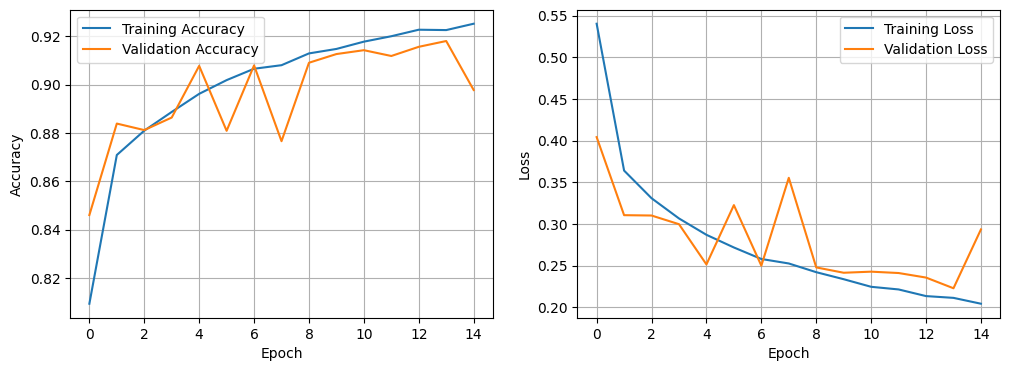

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

# Load the Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data for the convolutional layers
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a checkpoint callback to save the model weights with the .keras extension
checkpoint_path = "fashion_mnist_dcnn_weights.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max'
)

# Train the model and save training history
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[checkpoint])

# Save training history (loss and accuracy)
history_data = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy']
}

# Save the history data
with open("fashion_mnist_training_history.pkl", "wb") as file:
    pickle.dump(history_data, file)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7417 - loss: 0.7589 - val_accuracy: 0.8758 - val_loss: 0.3419
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8630 - loss: 0.3828 - val_accuracy: 0.8874 - val_loss: 0.3144
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8803 - loss: 0.3320 - val_accuracy: 0.8897 - val_loss: 0.2976
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8874 - loss: 0.3119 - val_accuracy: 0.8987 - val_loss: 0.2721
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8983 - loss: 0.2852 - val_accuracy: 0.9013 - val_loss: 0.2755
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9011 - loss: 0.2709 - val_accuracy: 0.9074 - val_loss: 0.2596
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9033 - loss: 0.2616 - val_accuracy: 0.9048 - val_loss: 0.2613
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9101 - loss: 0.

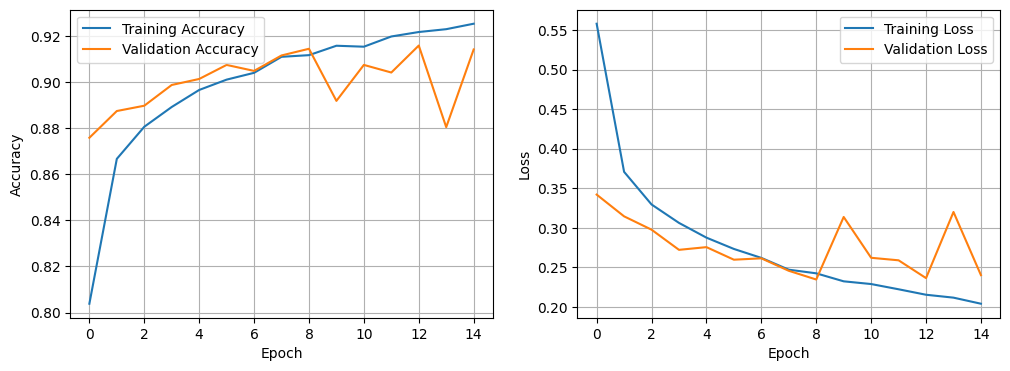

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle
import matplotlib.pyplot as plt

# Load and normalize Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the DCNN model with dropout and batch normalization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile and train the model with checkpointing for best model weights
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = "fashion_mnist_dcnn_weights.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_accuracy', mode='max')
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels), callbacks=[checkpoint])

# Save training history
with open("fashion_mnist_training_history.pkl", "wb") as file:
    pickle.dump(history.history, file)

# Plot the training/validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


2. Plot the evolution of the loss and accuracy for trianing and test data

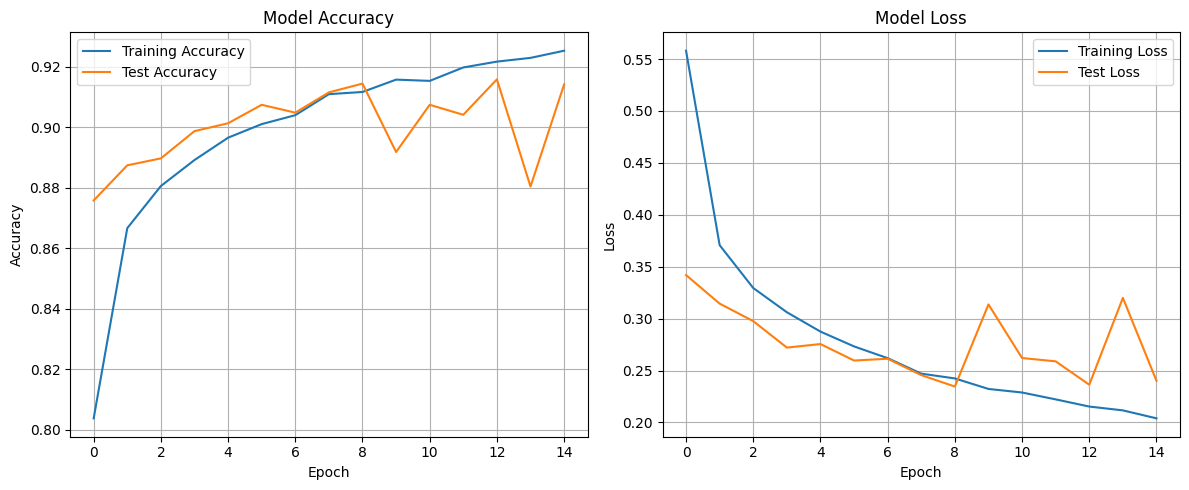

In [7]:
import matplotlib.pyplot as plt
import pickle

# Load training history
with open("fashion_mnist_training_history.pkl", "rb") as file:
    history_data = pickle.load(file)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


3. Ask ChatGPT to write the code to plot the ROC curve for the classifier

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


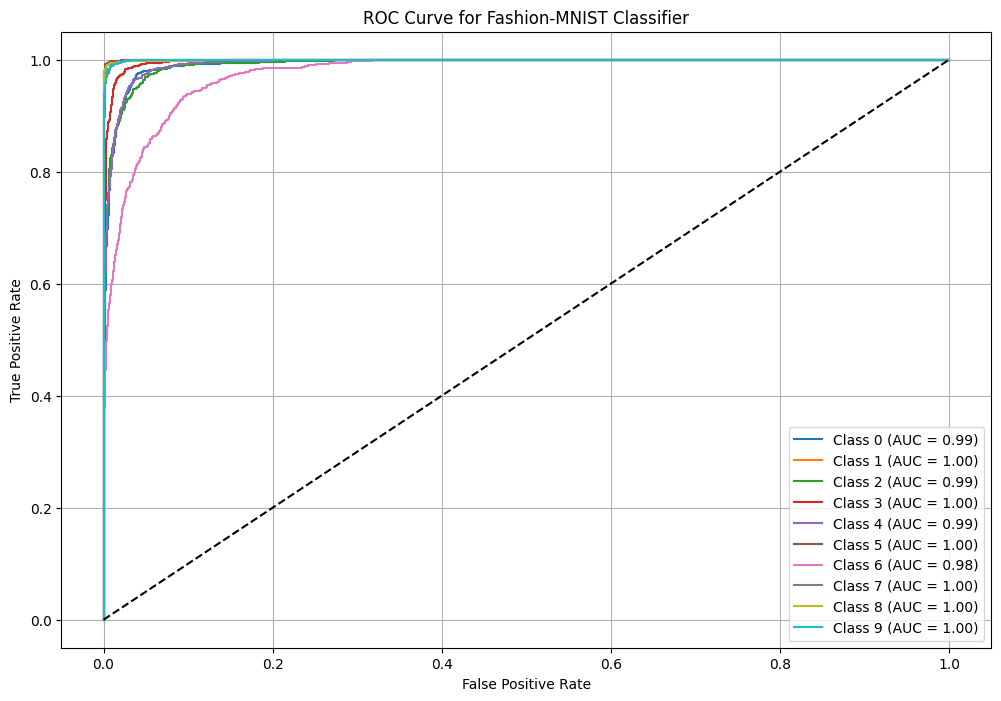

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the test data
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (test_images, test_labels) = fashion_mnist.load_data()
test_images = test_images / 255.0  # Normalize
test_images = test_images.reshape(-1, 28, 28, 1)

# Binarize the test labels for multi-class ROC
test_labels_binarized = label_binarize(test_labels, classes=range(10))

# Load the trained model (optional, if it needs to be reloaded)
model = tf.keras.models.load_model("fashion_mnist_dcnn_weights.keras")

# Get model predictions (probabilities)
y_score = model.predict(test_images)

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fashion-MNIST Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


4. Ask ChatGPT (and provide answers below):
- What is the dimensionality of the input to the classifier?
- What is the dimensionality of the output?
- Why the loss function is chosen?
- What is the metrics for performance?
- What is the role of MaxPool layers?
- What is the role of batch normalization layers?
- Can we use the Relu rather then softmax in the final layer
- What is the function of dropout layers?

Dimensionality of the Input to the Classifier:

The input dimensionality to the classifier is (28, 28, 1). This represents 28x28 pixel grayscale images, where the 1 channel indicates that these images are single-channel (grayscale) as opposed to three-channel (RGB).
Dimensionality of the Output:

The output dimensionality is 10, corresponding to the 10 possible classes in the Fashion-MNIST dataset. Each output node represents the probability of the input image belonging to one of the classes (e.g., T-shirt/top, Trouser, Pullover, etc.).
Why the Loss Function is Chosen:

The loss function used is sparse categorical cross-entropy, which is appropriate for multi-class classification tasks where each image belongs to one of the distinct classes. Cross-entropy loss measures the difference between the true labels and the predicted probability distribution, penalizing incorrect predictions more severely. Sparse categorical cross-entropy is used here instead of categorical cross-entropy because the labels are in integer form rather than one-hot encoded.
Metric for Performance:

Accuracy is used as the main metric for performance, as it provides a straightforward measure of how many predictions are correct out of the total predictions. Accuracy is commonly used in balanced datasets where each class has similar importance, which suits Fashion-MNIST well.
Role of MaxPooling Layers:

MaxPooling layers reduce the spatial dimensions (height and width) of the input representation by selecting the maximum value within each patch of the feature map. This operation helps to:
Decrease the computational load and memory requirements.
Make the model more invariant to small translations in the input (shift invariance).
Retain the most salient features, as only the maximum values are kept.
Role of Batch Normalization Layers:

Batch normalization layers normalize the inputs of each layer to have a mean of 0 and a standard deviation of 1. This helps in:
Reducing the internal covariate shift, which stabilizes and accelerates training.
Allowing for higher learning rates, potentially leading to faster convergence.
Acting as a form of regularization, which can help in reducing overfitting.
Can We Use ReLU Instead of Softmax in the Final Layer?:

No, we cannot use ReLU (Rectified Linear Activation Unit) instead of Softmax in the final layer for a classification task.
Softmax converts the output into a probability distribution across classes, ensuring that all class probabilities sum to 1.
ReLU is a linear activation that outputs raw scores, which cannot be interpreted as probabilities. Therefore, Softmax is required in the final layer for multi-class classification to provide interpretable class probabilities.
Function of Dropout Layers:

Dropout layers randomly deactivate a fraction of neurons in the layer during training. This helps in:
Reducing overfitting by preventing the model from becoming too reliant on specific neurons.
Encouraging the network to learn more robust features, as it must learn to make predictions even with certain neurons turned off.
Acting as a form of regularization by introducing noise into the training process, which improves generalization on unseen data.

Answers:


5. Perform the ablation study. Rewrite the code so that:
- we change the number of neurons (let's say divide it by factor of two several times)
- save the training curve
- save the ROC curve
And then plot them jointly. For example, if originally you had neural network with (128, 256) neurons, then you will generate training and ROC curves for (128,256), (64,  128), (32, 64), AND (16, 32).

Training model with dense layer configuration: (128, 256)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 21s - 11ms/step - accuracy: 0.7710 - loss: 0.6579 - val_accuracy: 0.8684 - val_loss: 0.3621
Epoch 2/10
1875/1875 - 14s - 7ms/step - accuracy: 0.8534 - loss: 0.4144 - val_accuracy: 0.8739 - val_loss: 0.3542
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8705 - loss: 0.3665 - val_accuracy: 0.8803 - val_loss: 0.3181
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8788 - loss: 0.3391 - val_accuracy: 0.8952 - val_loss: 0.2889
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8884 - loss: 0.3186 - val_accuracy: 0.8794 - val_loss: 0.3162
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8936 - loss: 0.3009 - val_accuracy: 0.9001 - val_loss: 0.2733
Epoch 7/10
1875/1875 - 13s - 7ms/step - accuracy: 0.8958 - loss: 0.2878 - val_accuracy: 0.9000 - val_loss: 0.2580
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9025 - loss: 0.2742 - val_accuracy: 0.9052 - val_loss: 0.2512
Epoch 9/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9047 - loss: 0.2673 - val_accuracy: 0.91

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 15s - 8ms/step - accuracy: 0.7491 - loss: 0.7217 - val_accuracy: 0.8548 - val_loss: 0.4034
Epoch 2/10
1875/1875 - 15s - 8ms/step - accuracy: 0.8446 - loss: 0.4562 - val_accuracy: 0.8593 - val_loss: 0.3771
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8607 - loss: 0.4031 - val_accuracy: 0.8729 - val_loss: 0.3434
Epoch 4/10
1875/1875 - 12s - 6ms/step - accuracy: 0.8730 - loss: 0.3707 - val_accuracy: 0.8874 - val_loss: 0.3223
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8795 - loss: 0.3479 - val_accuracy: 0.8769 - val_loss: 0.3319
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8872 - loss: 0.3300 - val_accuracy: 0.8939 - val_loss: 0.2879
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8919 - loss: 0.3149 - val_accuracy: 0.8963 - val_loss: 0.2826
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8948 - loss: 0.3048 - val_accuracy: 0.9084 - val_loss: 0.2549
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8981 - loss: 0.2950 - val_accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 15s - 8ms/step - accuracy: 0.7024 - loss: 0.8459 - val_accuracy: 0.8319 - val_loss: 0.4346
Epoch 2/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8206 - loss: 0.5260 - val_accuracy: 0.8578 - val_loss: 0.3978
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8476 - loss: 0.4635 - val_accuracy: 0.8428 - val_loss: 0.4357
Epoch 4/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8591 - loss: 0.4261 - val_accuracy: 0.8816 - val_loss: 0.3367
Epoch 5/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8710 - loss: 0.3960 - val_accuracy: 0.8677 - val_loss: 0.3590
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8755 - loss: 0.3810 - val_accuracy: 0.8916 - val_loss: 0.2977
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8827 - loss: 0.3604 - val_accuracy: 0.8998 - val_loss: 0.2940
Epoch 8/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8857 - loss: 0.3491 - val_accuracy: 0.8866 - val_loss: 0.3142
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8898 - loss: 0.3413 - val_accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 15s - 8ms/step - accuracy: 0.6127 - loss: 1.0830 - val_accuracy: 0.8103 - val_loss: 0.4934
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.7420 - loss: 0.7228 - val_accuracy: 0.8577 - val_loss: 0.4088
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.7761 - loss: 0.6409 - val_accuracy: 0.8725 - val_loss: 0.3588
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.7949 - loss: 0.5954 - val_accuracy: 0.8775 - val_loss: 0.3487
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8017 - loss: 0.5732 - val_accuracy: 0.8668 - val_loss: 0.3767
Epoch 6/10
1875/1875 - 11s - 6ms/step - accuracy: 0.8114 - loss: 0.5464 - val_accuracy: 0.8952 - val_loss: 0.3016
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.8182 - loss: 0.5299 - val_accuracy: 0.8871 - val_loss: 0.3255
Epoch 8/10
1875/1875 - 10s - 6ms/step - accuracy: 0.8219 - loss: 0.5191 - val_accuracy: 0.8820 - val_loss: 0.3265
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8305 - loss: 0.5005 - val_accuracy: 0.90

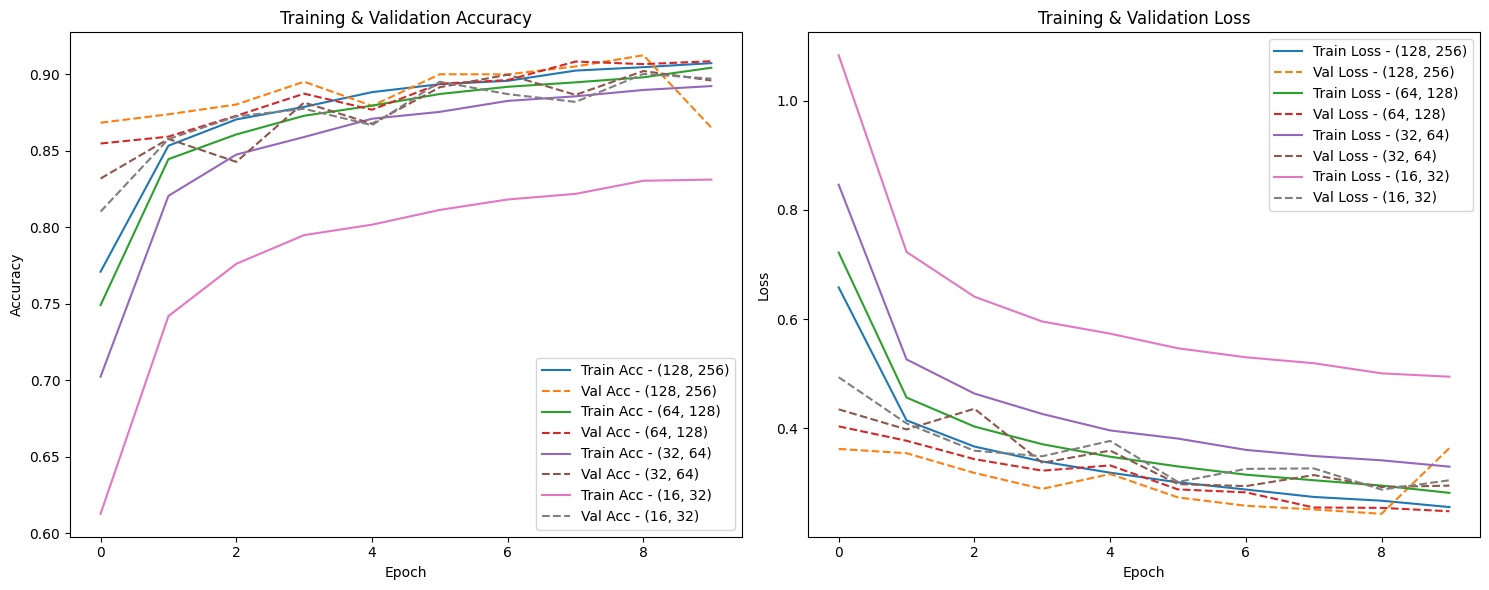

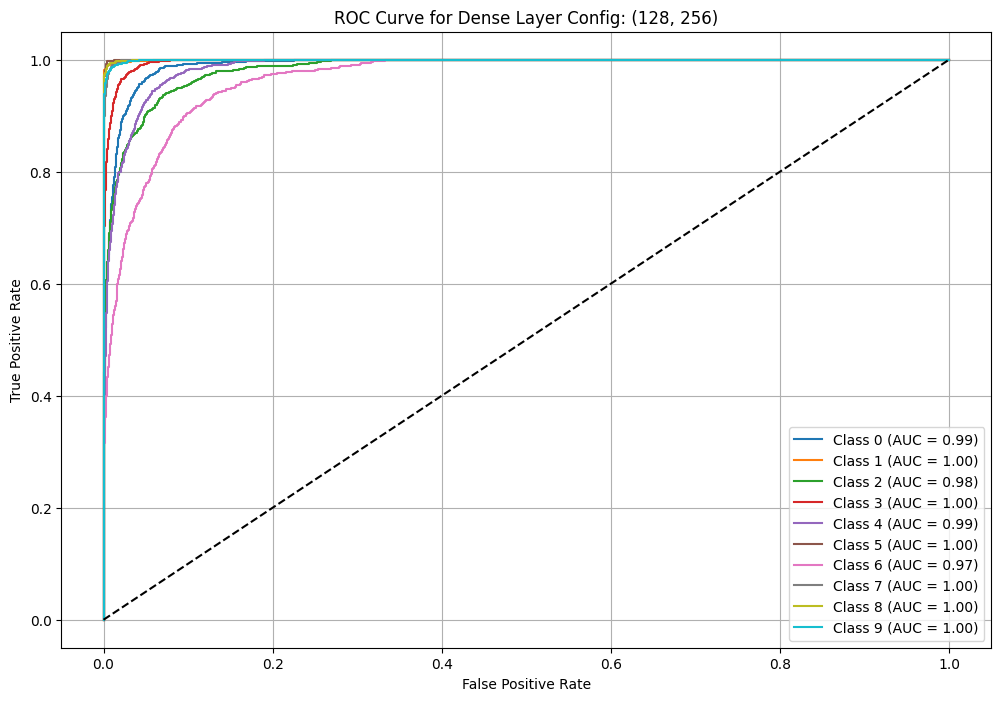

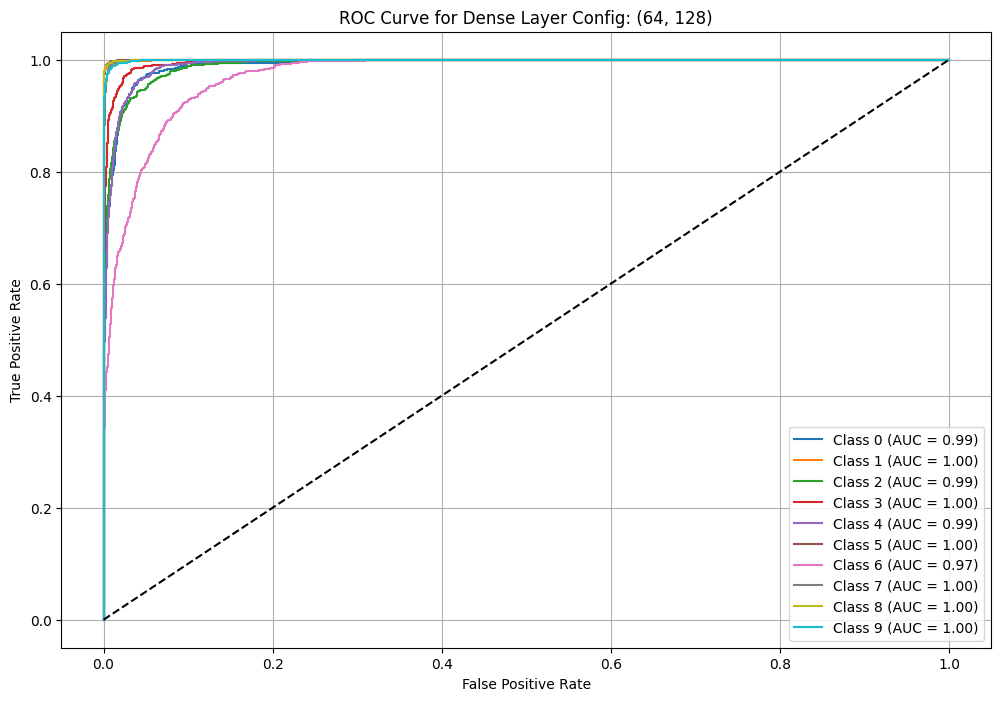

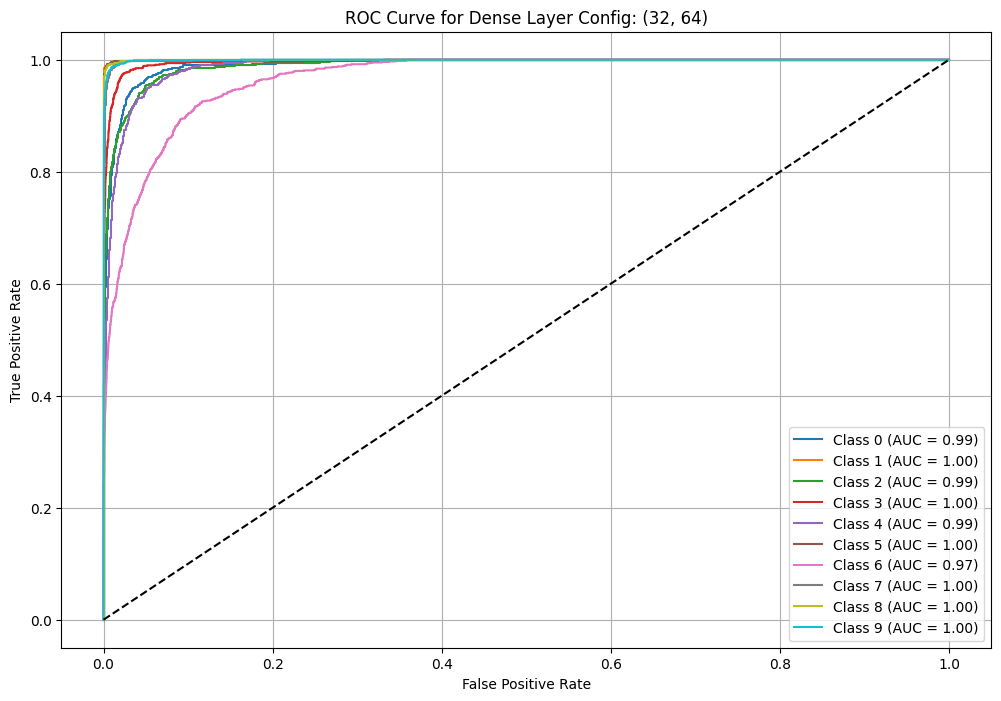

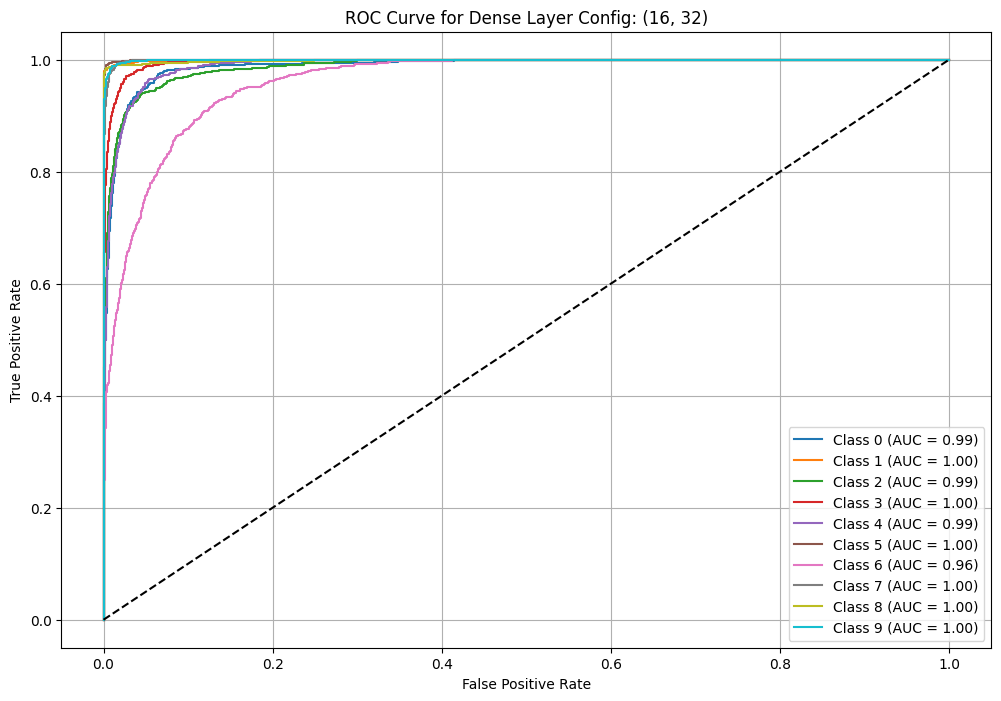

In [9]:
import pickle
import os

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Binarize the test labels for ROC
test_labels_binarized = label_binarize(test_labels, classes=range(10))

# Initial neuron configuration for the dense layers
neuron_configs = [(128, 256), (64, 128), (32, 64), (16, 32)]
history_dict = {}
roc_data = {}

# Directory for saving results
if not os.path.exists("ablation_study_results"):
    os.makedirs("ablation_study_results")

for config in neuron_configs:
    print(f"Training model with dense layer configuration: {config}")

    # Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),

        layers.Dense(config[0], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(config[1], activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and save history
    history = model.fit(
        train_images, train_labels,
        epochs=10, validation_data=(test_images, test_labels),
        verbose=2
    )

    # Save training history
    history_dict[config] = history.history

    # Generate predictions and ROC data
    y_score = model.predict(test_images)
    fpr_dict, tpr_dict, auc_dict = {}, {}, {}
    for i in range(10):
        fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_score[:, i])
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        auc_dict[i] = auc(fpr, tpr)

    roc_data[config] = {'fpr': fpr_dict, 'tpr': tpr_dict, 'auc': auc_dict}

# Save all data for later use
with open("ablation_study_results/training_history.pkl", "wb") as file:
    pickle.dump(history_dict, file)

with open("ablation_study_results/roc_data.pkl", "wb") as file:
    pickle.dump(roc_data, file)

# Plotting training curves for all configurations
plt.figure(figsize=(15, 6))
for config in neuron_configs:
    # Training accuracy and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict[config]['accuracy'], label=f'Train Acc - {config}')
    plt.plot(history_dict[config]['val_accuracy'], '--', label=f'Val Acc - {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Training loss and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict[config]['loss'], label=f'Train Loss - {config}')
    plt.plot(history_dict[config]['val_loss'], '--', label=f'Val Loss - {config}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot ROC curves for all configurations
for config in neuron_configs:
    plt.figure(figsize=(12, 8))
    for i in range(10):
        plt.plot(roc_data[config]['fpr'][i], roc_data[config]['tpr'][i],
                 label=f'Class {i} (AUC = {roc_data[config]["auc"][i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Dense Layer Config: {config}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


# Fashion MNIST VAE

6. Ask Chat GPT to write the simple MLP AE for Fashion MNIST data. Visualzie the latent distribution and latent representations.

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4533 - val_loss: 0.3154
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3097 - val_loss: 0.3050
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3024 - val_loss: 0.2992
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2962 - val_loss: 0.2958
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2927 - val_loss: 0.2932
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2902 - val_loss: 0.2913
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2890 - val_loss: 0.2894
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2869 - val_loss: 0.2881
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2853 - val_loss: 0.2870
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2848 - val_loss: 0.2858
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2834 - val_loss: 0.2847
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

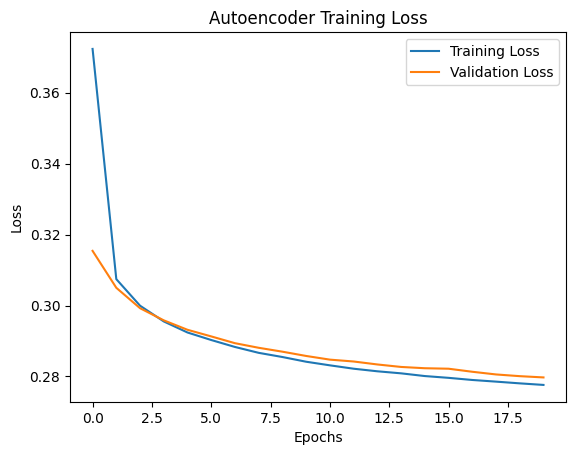

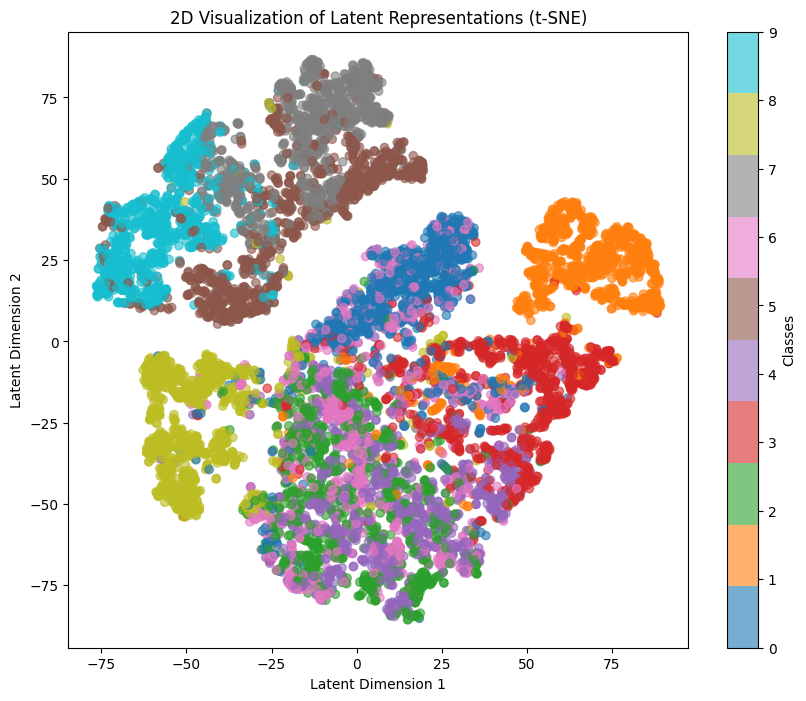

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for MLP input
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Define MLP Autoencoder architecture
encoding_dim = 64  # Dimension of the latent space

# Encoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(latent)
decoded = layers.Dense(128, activation='relu')(decoded)
output_img = layers.Dense(784, activation='sigmoid')(decoded)

# Build and compile the autoencoder model
autoencoder = models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(train_images_flat, train_images_flat,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(test_images_flat, test_images_flat))

# Encoder model for extracting latent representations
encoder = models.Model(input_img, latent)
latent_representations = encoder.predict(test_images_flat)

# Visualize the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

# Visualize the latent space (2D or 3D projection for simplicity)
# Use PCA or t-SNE to reduce the dimensionality of the latent space if needed

# Visualize the latent representations with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

# Plot the latent space with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label='Classes')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Visualization of Latent Representations (t-SNE)')
plt.show()


7. Ask Chat GPT to write the DCNN VAE AE for Fashion MNIST data. Visualzie the latent distribution and latent representations. Modify the program to save the latent represnetation and latent distributions every 5 steps as images.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
import os

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Latent dimension
latent_dim = 2  # Set to 2 for easier visualization

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(input_img)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)

# Latent space
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# Custom KL divergence layer
class KLDivergenceLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(kl_loss)
        return inputs

# Apply KL divergence layer
z_mean, z_log_var = KLDivergenceLayer()([z_mean, z_log_var])

# Decoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoded_img = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

# Define the VAE models
encoder = Model(input_img, [z_mean, z_log_var, z], name="encoder")
decoder = Model(decoder_input, decoded_img, name="decoder")
output = decoder(encoder(input_img)[2])

vae = Model(input_img, output, name="vae")

# Reconstruction loss
reconstruction_loss = tf.reduce_mean(
    tf.keras.losses.binary_crossentropy(input_img, output)
) * 28 * 28

vae.add_loss(reconstruction_loss)

# Compile the VAE model
vae.compile(optimizer='adam')

# Directory for saving images
if not os.path.exists("latent_visualizations"):
    os.makedirs("latent_visualizations")

# Training callback to save latent representations and distributions
class LatentVisualizationCallback(tf.keras.callbacks.Callback):
    def __init__(self, encoder, interval=5):
        super().__init__()
        self.encoder = encoder
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Get the latent representations
            z_mean, _, z = self.encoder.predict(test_images)

            # t-SNE for 2D projection if latent_dim > 2
            if latent_dim > 2:
                z_2d = TSNE(n_components=2).fit_transform(z)
            else:
                z_2d = z

            # Plot latent space distribution
            plt.figure(figsize=(8, 6))
            plt.scatter(z_2d[:, 0], z_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.7)
            plt.colorbar()
            plt.xlabel("Latent Dimension 1")
            plt.ylabel("Latent Dimension 2")
            plt.title(f"Latent Space Distribution at Epoch {epoch+1}")
            plt.savefig(f"latent_visualizations/latent_distribution_epoch_{epoch+1}.png")
            plt.close()

# Train the VAE model and save latent distributions every 5 epochs
vae.fit(train_images, train_images,
        epochs=50,
        batch_size=128,
        validation_data=(test_images, test_images),
        callbacks=[LatentVisualizationCallback(encoder)])

# Plot final latent space distribution after training
z_mean, _, z = encoder.predict(test_images)
z_2d = TSNE(n_components=2).fit_transform(z) if latent_dim > 2 else z

plt.figure(figsize=(8, 6))
plt.scatter(z_2d[:, 0], z_2d[:, 1], c=test_labels, cmap='tab10', alpha=0.7)
plt.colorbar()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Final Latent Space Distribution")
plt.show()


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


8. Can you upload the images and make a movie?

9. Write the defintions for:
- Latent istribution
- Latent represnetation
- Disentangling of represnetations
- Conditional VAE

Answers:

10. Explore if the ChatGPT can write a code for the VAE with rotational invariance

Answers:

11. Ask ChatGPT to write a class-conditioned VAE and plot the latent represnetations.

12. Can you identify the meaning of the latent variables?

Answers:

13. Explore with ChatGPT how VAEs are used for (one of):
- Image analysis
- Deep fakes
- Natural Language Programming
- Drug discovery
- Property optimization

# Example

14. Example: VAE written by ChatGPT

Epoch 1/30
469/469 [==============================] - 19s 9ms/step - loss: 312.6980 - val_loss: 277.9057
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 273.6553 - val_loss: 272.8212
Epoch 3/30
469/469 [==============================] - 4s 7ms/step - loss: 270.0811 - val_loss: 270.2526
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 268.0830 - val_loss: 268.2248
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 266.5072 - val_loss: 268.1187
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 265.5682 - val_loss: 268.4977
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 264.9324 - val_loss: 266.4536
Epoch 8/30
469/469 [==============================] - 3s 7ms/step - loss: 264.2672 - val_loss: 265.6768
Epoch 9/30
469/469 [==============================] - 3s 7ms/step - loss: 263.8481 - val_loss: 266.1061
Epoch 10/30
469/469 [==============================] - 4s 8ms/s

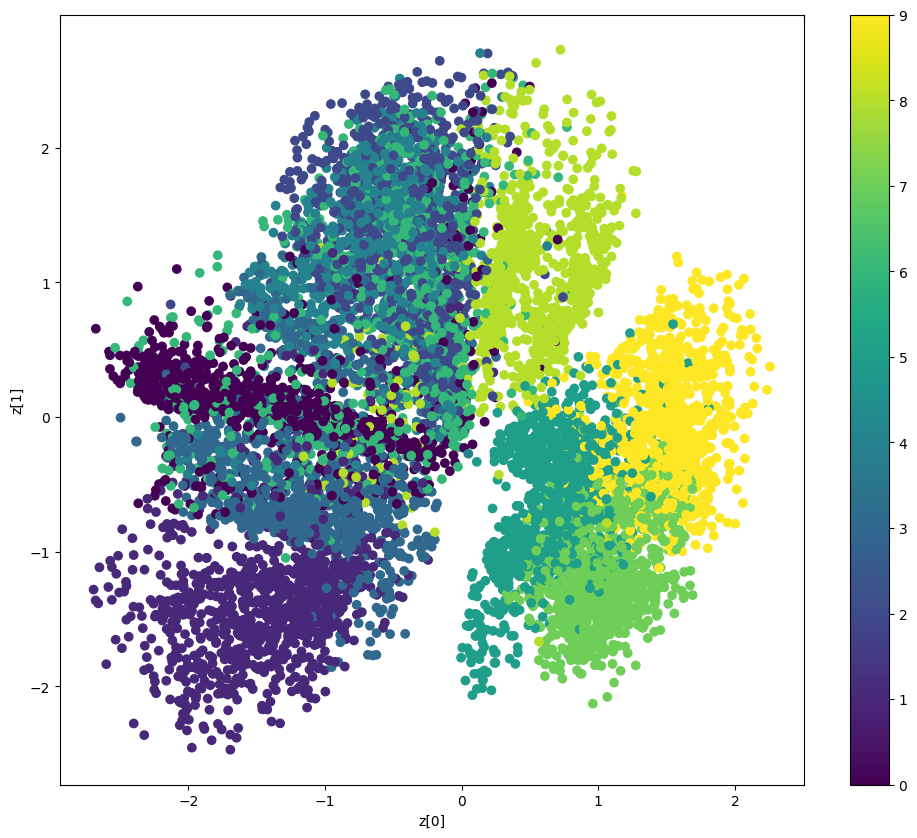

1/1 [==============================] - 0s 20ms/step


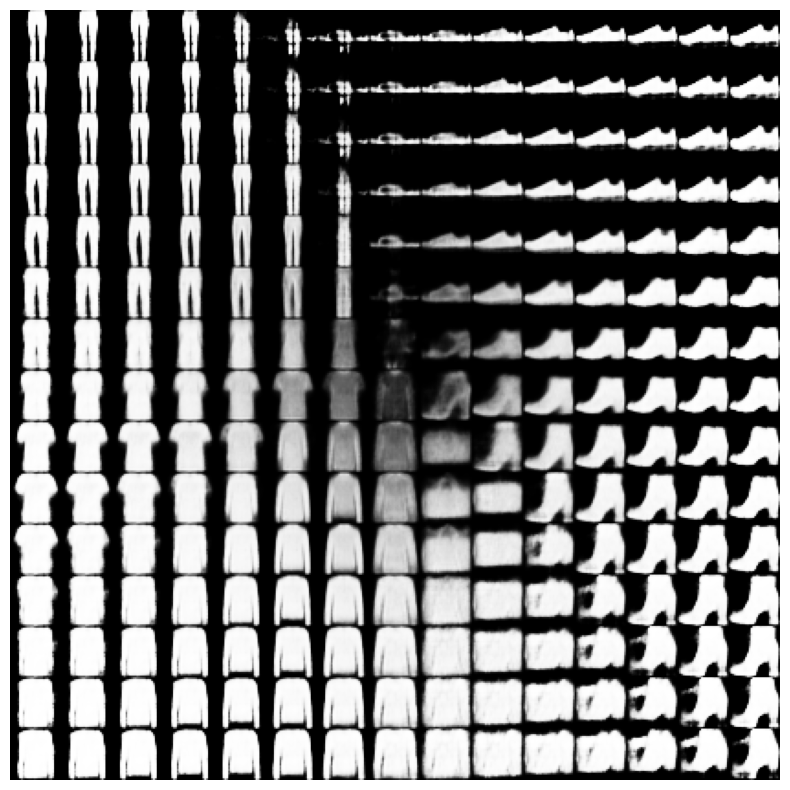

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

latent_dim = 2  # Dimensionality of the latent space

inputs = Input(shape=(image_size, image_size, 1), name='encoder_input')
x = Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = binary_crossentropy(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= image_size * image_size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=30, batch_size=128, validation_data=(x_test, None))

def plot_label_clusters(encoder, data, labels):
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

plot_label_clusters(encoder, x_test, y_test)

n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()